## Import

In [1]:
# install dependencies
%%capture
!pip install rasterio
!pip install cartopy

# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio
import cartopy.crs as ccrs
import pickle
import rasterio
from rasterio.windows import Window
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# from rasterio.transform import from_origin_resolution
import os
import seaborn as sns
# Set font and theme
sns.set_theme(style="white", font_scale=1.2)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Predict

### Yehuda's drive pathes

In [ ]:
# Define constants and variables at the top
MODEL_PATH = '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/model-svm.pkl' #Yehuda's drive path

GEOTIFF_PATH = "/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tsora_venus_clipped_26_10_2020.tif"
CHUNK_SIZE = 1000
BINARY_OUTPUT_PATH = 'binary_predictions.tif'
PROBABILITY_OUTPUT_PATH = '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Prediction_Prob_Yishi_18_09_2020.tif'

LIST_FILES = [
    '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Yishi_venus_clipped_01_12_2017.tif',
    '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Yishi_venus_clipped_11_09_2018.tif',
    '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Yishi_venus_clipped_18_09_2019.tif',
    '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Yishi_venus_clipped_18_09_2020.tif'
]

### Netanel's drive pathes

In [12]:
# NETANEL'S DRIVE PATHES

MODEL_PATH = '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/classification_model_SVM/model-svm.pkl' #Netanel's drive path
GEOTIFF_PATH = "/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2020_09_18.tif"
CHUNK_SIZE = 1000
BINARY_OUTPUT_PATH = 'binary_predictions.tif'
#PROBABILITY_OUTPUT_PATH = '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Prediction_Prob_Yishi_18_09_2020.tif'

# LIST_FILES = [
#     '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Yishi_venus_clipped_01_12_2017.tif',
#     '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Yishi_venus_clipped_11_09_2018.tif',
#     '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Yishi_venus_clipped_18_09_2019.tif',
#     '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Yishi_venus_clipped_18_09_2020.tif'
# ]

#### list of images for time series

In [6]:
# Define the path to your folder in Google Drive
folder_path = '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon'
site = 'Tsora'
# Yehuda
#folder_path = '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files'

# Initialize an empty list to hold the file paths
list_files = []

# Traverse the directory to find all .tif files
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.tif'):
            # Create the full path and add it to the list
            full_path = os.path.join(root, file)
            list_files.append(full_path)
list_files = sorted(list_files)

# Keep only files with specific name in the tif file
#list_files = [file for file in list_files if 'Lachish_venus' in file]    #modify!

print(len(list_files))
list_files

14


['/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2017_12_01.tif',
 '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2018_02_21.tif',
 '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2018_06_07.tif',
 '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2018_09_11.tif',
 '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2018_12_04.tif',
 '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2019_03_18.tif',
 '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2019_06_02.tif',
 '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped f

In [ ]:
# if needed - drop some of them

list_to_remove = ['/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2020_02_13.tif',
                  '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2020_10_26.tif'
                  ]

list_to_remove_yehuda = [
    '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files/Tzora_polygon/Tzora_venus_clipped_2020_02_13.tif',
    '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files/Tzora_polygon/Tzora_venus_clipped_2020_10_26.tif'
]
for item in list_to_remove_yehuda:  #adjust!
  list_files.remove(item)

print(len(list_files))
list_files


12


['/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files/Tzora_polygon/Tzora_venus_clipped_2017_12_01.tif',
 '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files/Tzora_polygon/Tzora_venus_clipped_2018_02_21.tif',
 '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files/Tzora_polygon/Tzora_venus_clipped_2018_06_07.tif',
 '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files/Tzora_polygon/Tzora_venus_clipped_2018_09_11.tif',
 '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files/Tzora_polygon/Tzora_venus_clipped_2018_12_04.tif',
 '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files/Tzora_polygon/Tzora_venus_clipped_2019_03_18.tif',
 '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files/Tzora_polygon/Tzora_venus_clipped_2019_06_02.tif',
 '/content/drive/MyDrive/LWP_Netanel/VenUs-Data/Tzora_polygon/clipped files/Tzora_polygon/Tzora_venus_clipped_2

In [7]:
#if needed - defind the list manually:

list_files = ['/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2018_09_11.tif',
 '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2019_09_18.tif',
 '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2020_09_18.tif',
 ]

### predicting

#### fundamental functions

In [16]:
def load_model_and_scaler(filename=MODEL_PATH):
    """Load the model and scaler from a file."""
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data['model'], data['scaler']

def predict_geotiff(model, scaler, geotiff_path, chunk_size=CHUNK_SIZE):
    """Make predictions on a GeoTIFF file using the given model and scaler, excluding the first band."""
    with rasterio.open(geotiff_path) as src:
        height = src.height
        width = src.width
        band_count = src.count

        # Initialize arrays to store predictions
        binary_predictions = np.zeros((height, width), dtype=np.float32)
        probability_predictions = np.zeros((height, width), dtype=np.float32)
        positive_count = 0
        negative_count = 0

        for y in range(0, height, chunk_size):
            for x in range(0, width, chunk_size):
                window = Window(x, y, min(chunk_size, width - x), min(chunk_size, height - y))
                data = src.read(window=window)

                # Exclude the first band
                data = data[1:, :, :]

                features = data.reshape(band_count - 1, -1).T

                # Normalize the features
                features_normalized = scaler.transform(features)

                # Predict probability values (decision function for SVM)
                decision_values = model.decision_function(features_normalized)

                # Convert decision function to probabilities using a logistic function
                probabilities = 1 / (1 + np.exp(-decision_values))

                # Binary predictions based on decision threshold
                binary_pred = np.where(probabilities > 0.5, 1, 0)

                # Count positive (no risk) and negative (risk) predictions
                positive_count += np.sum(binary_pred == 1)
                negative_count += np.sum(binary_pred == 0)

                # Reshape predictions back to original window size
                binary_pred = binary_pred.reshape((window.height, window.width))
                probabilities = probabilities.reshape((window.height, window.width))

                # Store predictions
                binary_predictions[y:y+window.height, x:x+window.width] = binary_pred
                probability_predictions[y:y+window.height, x:x+window.width] = probabilities

    return binary_predictions, probability_predictions, src.meta, positive_count, negative_count

def plot_binary_prediction(predictions, title="Binary Prediction Map"):
    """Plot binary prediction map."""
    plt.figure(figsize=(8, 8))
    plt.imshow(predictions, cmap='binary')
    # Color bar for binary (only 0 and 1 as discrete)
    plt.colorbar(ticks=[0, 1])
    plt.title(title)
    plt.show()

def plot_probability_prediction(predictions, title="Probability Prediction Map"):
    """Plot probability prediction map."""
    plt.figure(figsize=(8, 8))
    plt.imshow(predictions, cmap='coolwarm')
    plt.colorbar(label='Prediction Probability')
    plt.title(title)
    plt.show()

def save_predictions_as_geotiff(predictions, meta, output_path):
    """Save predictions as a GeoTIFF file."""
    meta.update({
        'dtype': 'float32',
        'count': 1
    })

    with rasterio.open(output_path, 'w', **meta) as dst:
        dst.write(predictions, 1)

def get_rgb_image(geotiff_path):
    """Extract RGB bands (7, 4, 3) from the GeoTIFF file."""
    with rasterio.open(geotiff_path) as src:
        red = src.read(7)
        green = src.read(4)
        blue = src.read(3)

    rgb = np.dstack((red, green, blue))
    rgb = rgb / rgb.max()  # Normalize to 0-1 range
    return rgb

In [18]:
# 2. Load the model and scaler
model, scaler = load_model_and_scaler()

# 3. Make predictions
geotiff_path = '/content/drive/MyDrive/projects/Thesis/data/satelites/Venus_data/clipped files/Tzora_polygon/Tzora_venus_clipped_2020_09_18.tif'  # Or any other path to your GeoTIFF file
binary_predictions, probability_predictions, metadata, _, _ = predict_geotiff(model, scaler, geotiff_path )

#### single image

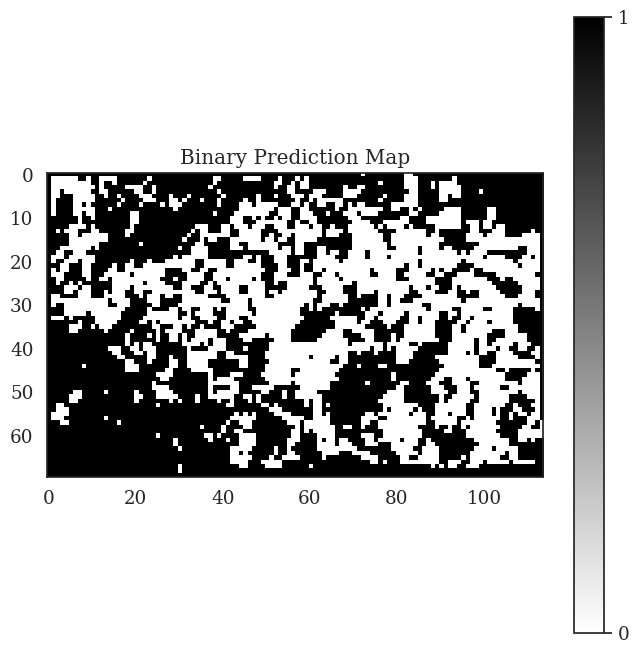

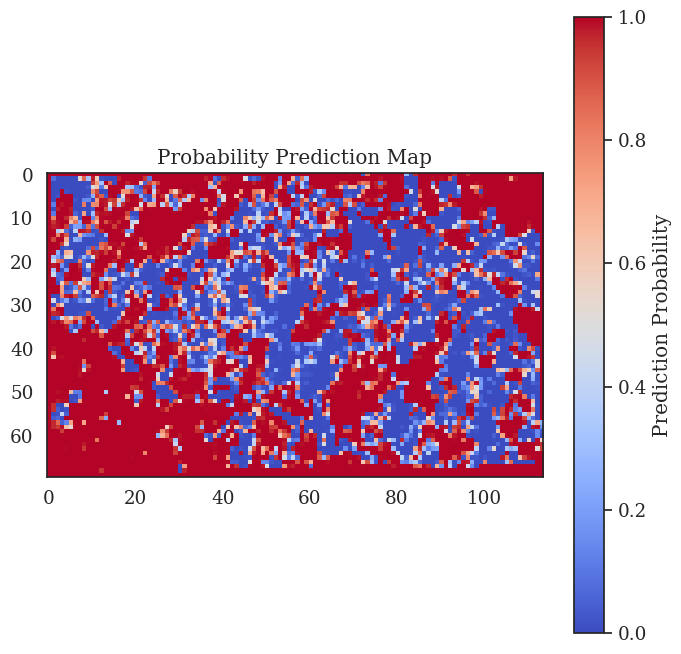

In [ ]:


# 4. Plot the results
plot_binary_prediction(binary_predictions)
plot_probability_prediction(probability_predictions)

# 5. Save predictions (Uncomment if needed)
# save_predictions_as_geotiff(binary_predictions, metadata, BINARY_OUTPUT_PATH)
# save_predictions_as_geotiff(probability_predictions, metadata, PROBABILITY_OUTPUT_PATH)


#### time series of several Images

In [21]:
def plot_multi_year_forecast_and_rgb(file_list, model, scaler):
    """Plot 4-year continuous forecasts and RGB images."""
    fig, axs = plt.subplots(2, 3, figsize=(15, 12))

    for idx, file_path in enumerate(list_files):
        # Make predictions
        binary_predictions, probability_predictions, _, _, _ = predict_geotiff(model, scaler, file_path)

        # Get RGB image
        rgb_image = get_rgb_image(file_path)

        # Extract year and month from filename
        filename = os.path.basename(file_path)
        try:
            # Assuming the file pattern is like 'Yishi_venus_clipped_dd_mm_yyyy.tif'
            parts = filename.split('_')
            site = parts[0]
            day = int(parts[3])
            month = int(parts[4])
            year = int(parts[5].split('.')[0])  # Remove the file extension
        except (IndexError, ValueError) as e:
            print(f"Error parsing date from filename {filename}: {e}")
            continue

        title = f"{day}/{month}/{year}"

        # Plot forecast
        axs[0, idx].imshow(probability_predictions, cmap='coolwarm')
        axs[0, idx].set_title(f"Forecast {title}")
        axs[0, idx].axis('off')

        # Plot RGB image
        axs[1, idx].imshow(rgb_image)
        axs[1, idx].set_title(f"RGB {title}")
        axs[1, idx].axis('off')
    fig.suptitle(f'Multi-year Forecast and RGB Images - {site}', fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()




/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


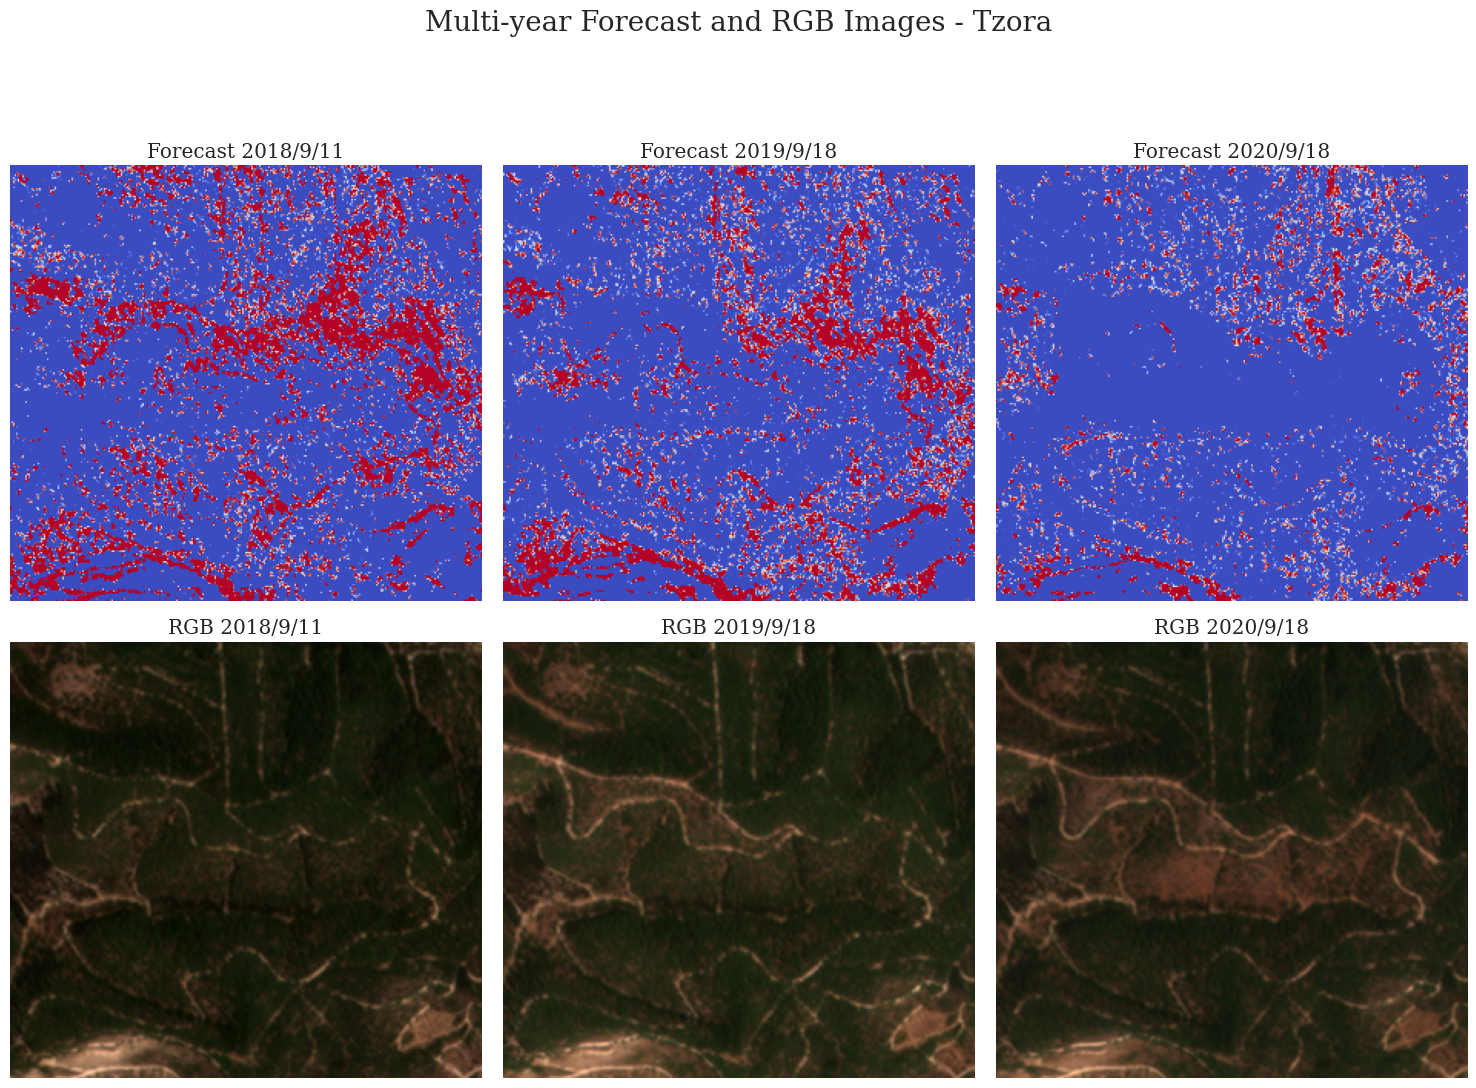

In [22]:
# Main execution

filename = MODEL_PATH
model, scaler = load_model_and_scaler(filename)

plot_multi_year_forecast_and_rgb(list_files, model, scaler)

<ipython-input-10-424acaaa128f>:16: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axs[row_idx, 0].annotate(f'{year}\nPrecipitation: {precipitation_values[row_idx]} mm',
<ipython-input-10-424acaaa128f>:16: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axs[row_idx, 0].annotate(f'{year}\nPrecipitation: {precipitation_values[row_idx]} mm',
<ipython-input-10-424acaaa128f>:16: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  axs[row_idx, 0].annotate(f'{year}\nPrecipitation: {precipitation_values[row_idx]} mm',


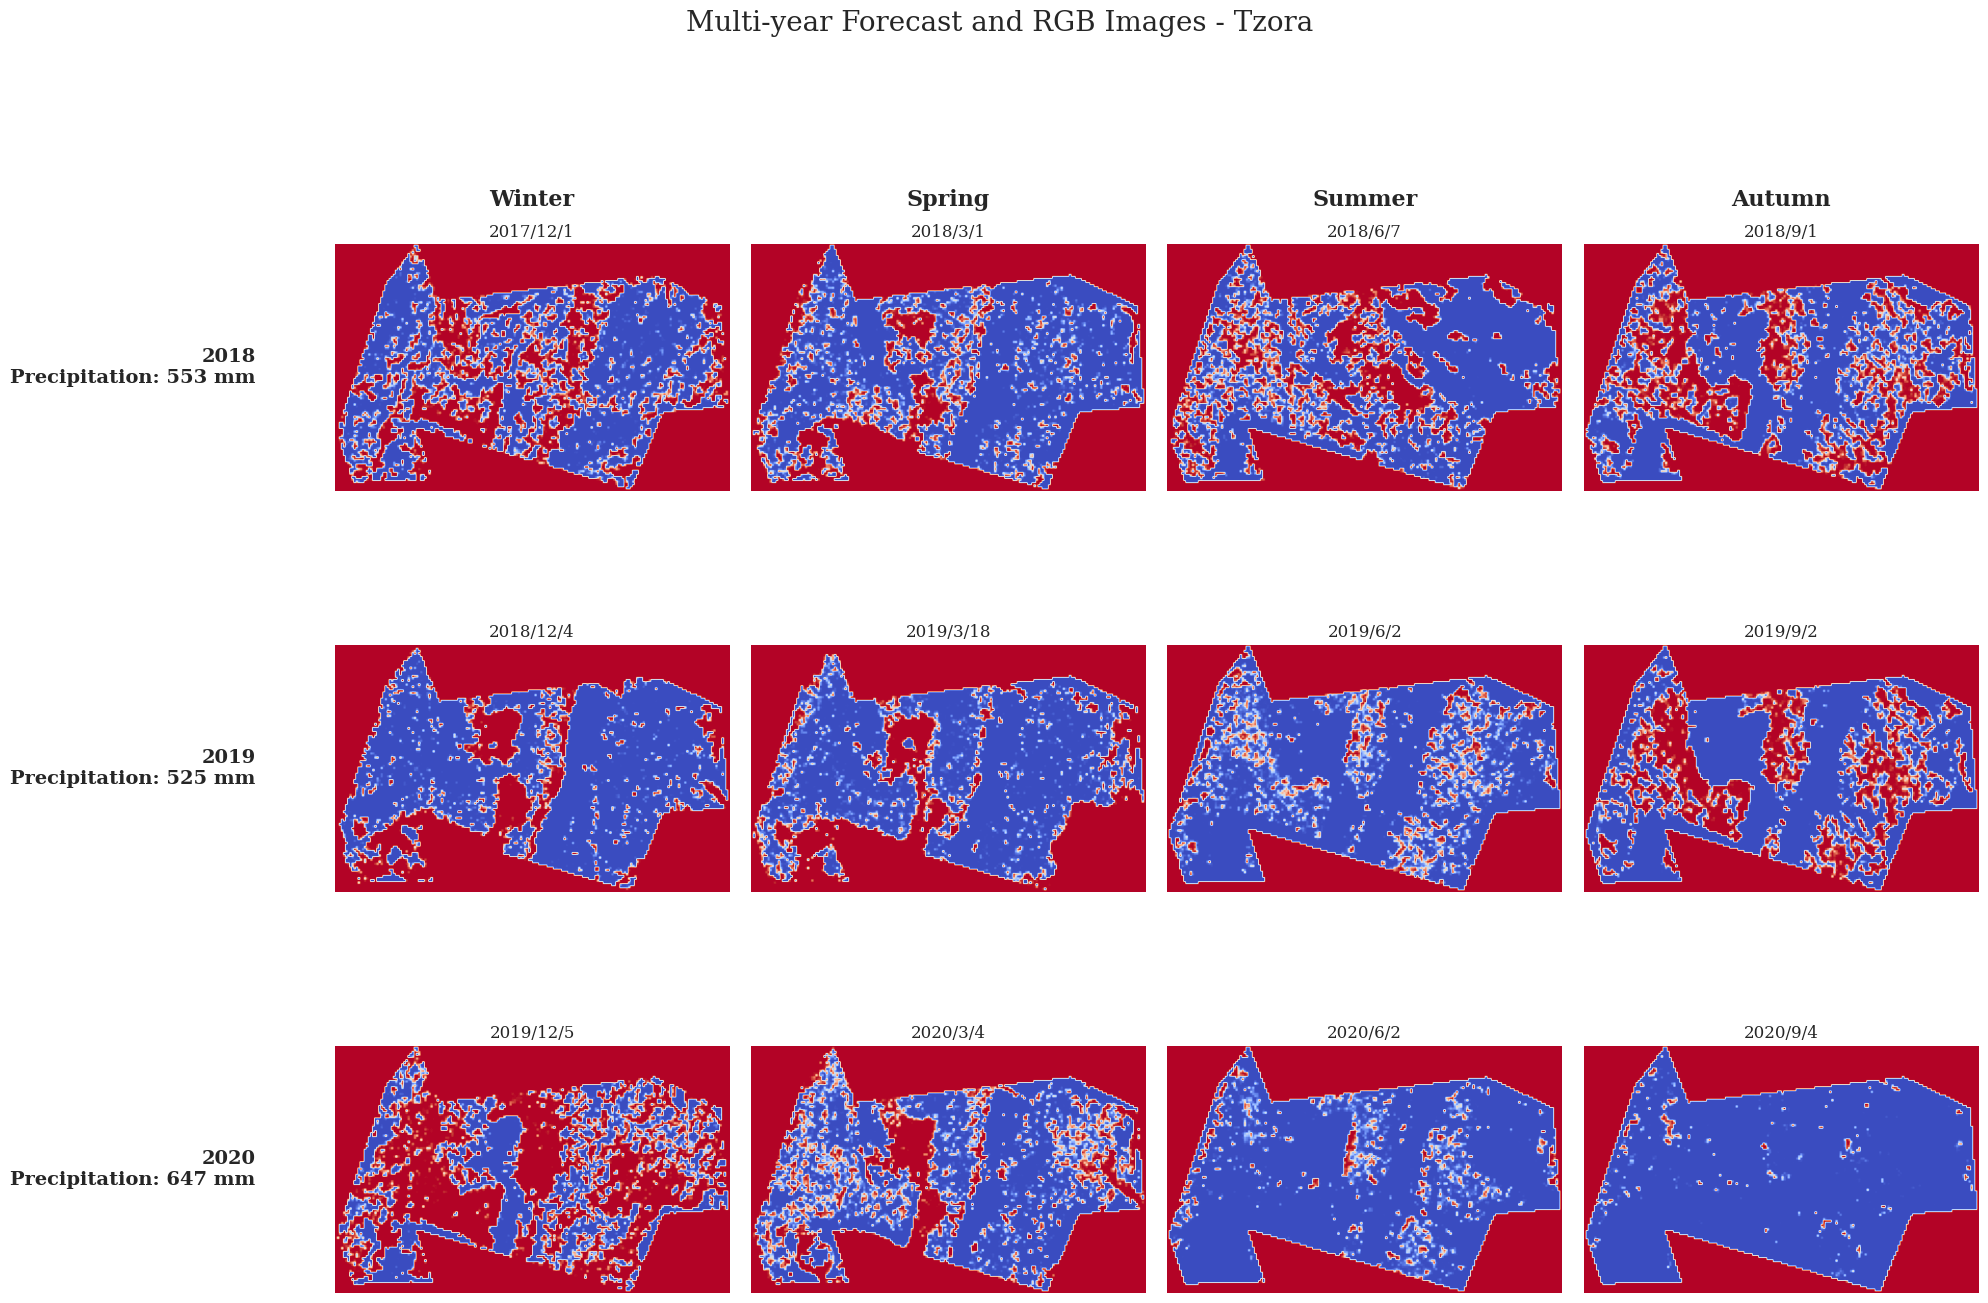

In [ ]:
def plot_multi_year_forecast_and_rgb(file_list, model, scaler, precipitation_values):
    """Plot 3-year continuous forecasts with seasonal columns and yearly rows."""
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  # 3 rows, 4 columns for the seasons
    fig.suptitle('Multi-year Forecast and RGB Images - Tzora', fontsize=20)

    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
    years = [2018, 2019, 2020]

    for col_idx, season in enumerate(seasons):
        axs[0, col_idx].annotate(season, xy=(0.5, 1.1), xytext=(0, 10),
                                 xycoords='axes fraction', textcoords='offset points',
                                 ha='center', va='baseline', fontsize=16, weight='bold')

    for row_idx, year in enumerate(years):
        # Annotate year and precipitation at the start of each row
        axs[row_idx, 0].annotate(f'{year}\nPrecipitation: {precipitation_values[row_idx]} mm',
                                 xy=(-0.2, 0.5), xycoords='axes fraction',
                                 textcoords='offset points', ha='right', va='center',
                                 fontsize=14, weight='bold')

        for col_idx in range(4):
            idx = row_idx * 4 + col_idx
            if idx >= len(file_list):
                axs[row_idx, col_idx].axis('off')
                continue

            file_path = file_list[idx]

            # Make predictions
            binary_predictions, probability_predictions, _, _, _ = predict_geotiff(model, scaler, file_path)

            # Get RGB image (if needed in the future, uncomment the following line)
            # rgb_image = get_rgb_image(file_path)

            # Extract date from filename
            filename = os.path.basename(file_path)
            try:
                parts = filename.split('_')
                day = int(parts[3])
                month = int(parts[4])
                year = int(parts[5].split('.')[0])  # Remove the file extension
            except (IndexError, ValueError) as e:
                print(f"Error parsing date from filename {filename}: {e}")
                continue

            date_title = f"{day}/{month}/{year}"

            # Plot forecast
            axs[row_idx, col_idx].imshow(probability_predictions, cmap='coolwarm')
            axs[row_idx, col_idx].set_title(date_title, fontsize=12)
            axs[row_idx, col_idx].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage
precipitation_values = [553, 525, 647]  # Example precipitation values for each year
plot_multi_year_forecast_and_rgb(list_files, model, scaler, precipitation_values)


this the code i use:

In [ ]:
def process_files(file_list, model, scaler):
    """Process files, make predictions, and store percentages in a dictionary."""
    results = []

    # Iterate through the files
    for file_path in file_list:
        # Extract date information from the filename
        filename = os.path.basename(file_path)
        try:
            parts = filename.split('_')
            site = parts[0]
            year = int(parts[3])
            month = int(parts[4])
            day = int(parts[5].split('.')[0])
        except (IndexError, ValueError) as e:
            print(f"Error parsing date from filename {filename}: {e}")
            continue

        # Adjust for hydrological year
        if month >= 10:
            hydrological_year = year + 1  # Oct, Nov, Dec belong to the next year
        else:
            hydrological_year = year

        # Determine the season from the month (Winter starts in December and includes January and February)
        if month == 12 or month == 1: #or month == 2:
            season = 'Winter'
        elif 2 <= month <= 5:
            season = 'Spring'
        elif 6 <= month <= 8:
            season = 'Summer'
        elif 9 <= month <= 11:
            season = 'Autumn'

        # Make predictions and get pixel counts
        binary_predictions, _, _, positive_count, negative_count = predict_geotiff(model, scaler, file_path)

        # Calculate percentages
        total_pixels = positive_count + negative_count
        positive_percentage = (positive_count / total_pixels) * 100
        negative_percentage = (negative_count / total_pixels) * 100

        # Store the results in a dictionary
        results.append({
            'file': filename,
            'year': hydrological_year,
            'season': season,
            'dryness_percentage': positive_percentage
        })

    return results

In [ ]:
def process_files_to_anova(file_list, model, scaler):
    """Process files, make predictions, and store all prediction values."""
    results = []
    for file_path in file_list:
        filename = os.path.basename(file_path)
        try:
            parts = filename.split('_')
            site = parts[0]
            year = int(parts[3])
            month = int(parts[4])
            day = int(parts[5].split('.')[0])
        except (IndexError, ValueError) as e:
            print(f"Error parsing date from filename {filename}: {e}")
            continue

        hydrological_year = year + 1 if month >= 10 else year

        if month == 12 or month == 1:
            season = 'Winter'
        elif 2 <= month <= 5:
            season = 'Spring'
        elif 6 <= month <= 8:
            season = 'Summer'
        elif 9 <= month <= 11:
            season = 'Autumn'

        binary_predictions, probability_predictions, metadata, _, _ = predict_geotiff(model, scaler, file_path)

        # Flatten the binary_predictions array
        flat_predictions = probability_predictions.flatten()

        # Create a record for each prediction value
        for value in flat_predictions:
            results.append({
                'file': filename,
                'year': hydrological_year,
                'season': season,
                'value': value
            })

    return results

def create_forecast_df(results):
    """Create a DataFrame with year, season, and value columns from the results."""
    df = pd.DataFrame(results)

    # Sort the DataFrame by year and season
    season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
    df['season'] = pd.Categorical(df['season'], categories=season_order, ordered=True)
    df = df.sort_values(['year', 'season', 'file'])

    # Drop the 'file' column as it's no longer needed
    df = df.drop(columns=['file'])

    return df

results = process_files_to_anova(list_files, model, scaler)
forecast_df = create_forecast_df(results)
forecast_df.to_csv('Autumn_Tzora_2018-2020.csv')

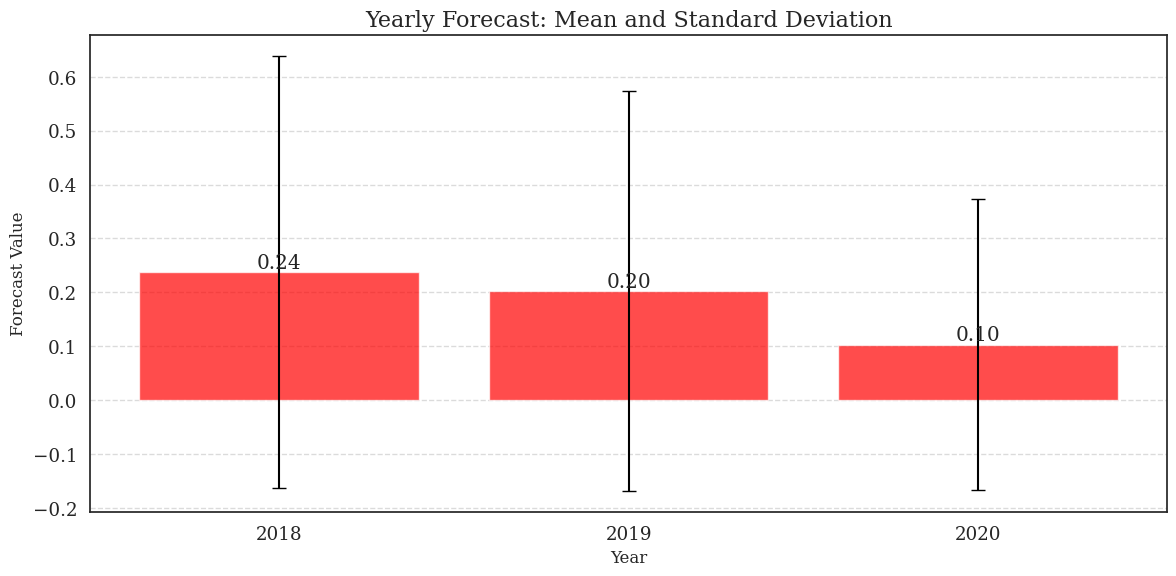

In [ ]:
def create_yearly_forecast_graph(df):
    """
    Create a bar graph of yearly forecast means with standard deviation error bars.

    :param df: DataFrame with columns 'year' and 'value'
    """
    # Group by year and calculate mean and std
    yearly_stats = df.groupby('year')['value'].agg(['mean', 'std']).reset_index()

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot bars for mean values
    bars = plt.bar(yearly_stats['year'], yearly_stats['mean'], yerr=yearly_stats['std'],
                   capsize=5, alpha=0.7, color='#ff0000', ecolor='black')

    # Customize the plot
    plt.title('Yearly Forecast: Mean and Standard Deviation', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Forecast Value', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Rotate x-axis labels if there are many years
    if len(yearly_stats) > 10:
        plt.xticks(rotation=45, ha='right')

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom')
    # Xtics 2018, 2019, 2020
    plt.xticks([2018, 2019, 2020])

    plt.tight_layout()
    plt.show()


create_yearly_forecast_graph(forecast_df)

for now, I don't use this code, because it is refers to regular years, not to hydrological years.

In [ ]:
# ################## YEHUDA'S CODE, MAYBE I WILL USE IT #####################



# def process_files(file_list, model, scaler):
#     """Process files, make predictions, and store percentages in a dictionary."""
#     results = []

#     # Iterate through the files
#     for file_path in file_list:
#         # Extract date information from the filename
#         filename = os.path.basename(file_path)
#         try:
#             parts = filename.split('_')
#             site = parts[0]
#             year = int(parts[3])
#             month = int(parts[4])
#             day = int(parts[5].split('.')[0])
#         except (IndexError, ValueError) as e:
#             print(f"Error parsing date from filename {filename}: {e}")
#             continue

#         # Filter for years 2018-2020
#         # if year < 2018 or year > 2020:
#         #     continue

#         # Determine the season from the month (Winter starts in December and includes January and February)
#         if month == 12 or month == 1 or month == 2:
#             season = 'Winter'
#         elif 3 <= month <= 5:
#             season = 'Spring'
#         elif 6 <= month <= 8:
#             season = 'Summer'
#         elif 9 <= month <= 11:
#             season = 'Autumn'


#         # Make predictions and get pixel counts
#         binary_predictions, _, _, positive_count, negative_count = predict_geotiff(model, scaler, file_path)

#         # Calculate percentages
#         total_pixels = positive_count + negative_count
#         positive_percentage = (positive_count / total_pixels) * 100
#         negative_percentage = (negative_count / total_pixels) * 100

#         # Store the results in a dictionary
#         results.append({
#             'file': filename,
#             'year': year,
#             'season': season,
#             'dryness_percentage': positive_percentage
#         })

#     return results

here we continue:

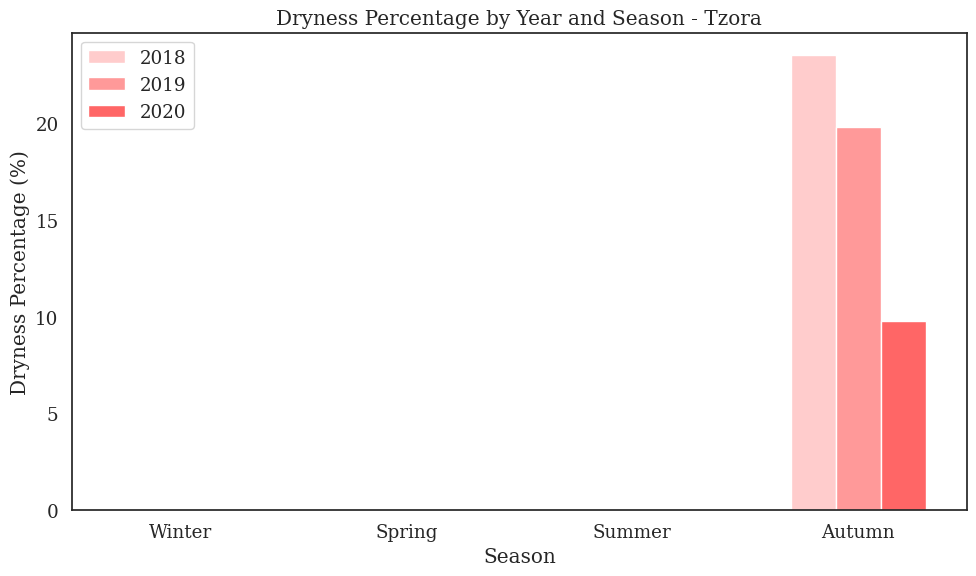

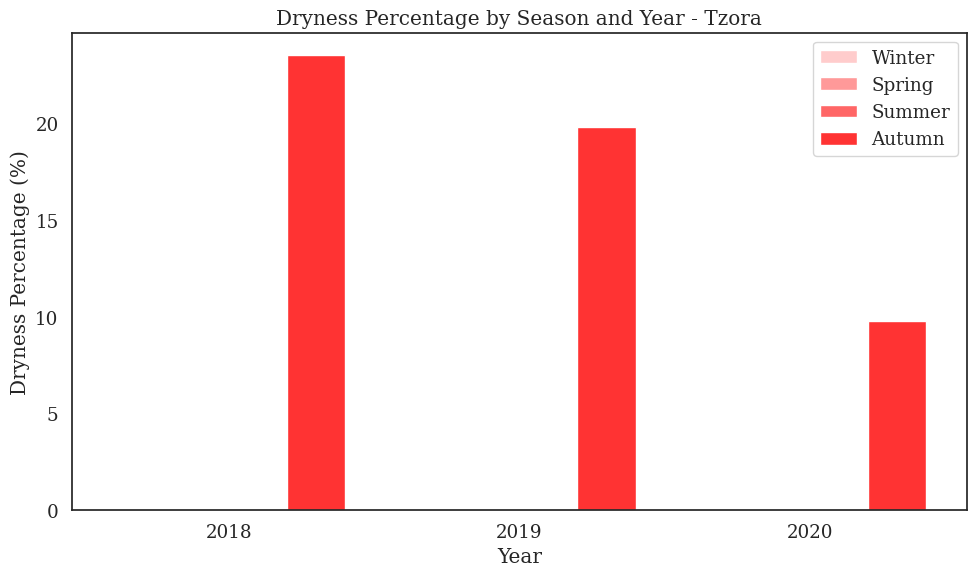

In [ ]:
def plot_dryness_by_year_season(results, colors, site):
    """Plot dryness percentage by year for each season with custom colors."""
    # Organize results by year and season
    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
    years = sorted(list(set([result['year'] for result in results])))

    # Initialize dictionary to store percentages
    data_by_year_season = {year: {season: 0 for season in seasons} for year in years}

    for result in results:
        data_by_year_season[result['year']][result['season']] = result['dryness_percentage']

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    x = np.arange(len(seasons))  # Label locations for seasons

    for i, year in enumerate(years):
        # Extract percentages for this year
        percentages = [data_by_year_season[year][season] for season in seasons]
        ax.bar(x + i * bar_width, percentages, width=bar_width, color=colors[i], label=f'{year}')

    # Labels and title
    ax.set_xticks(x + bar_width * (len(years) - 1) / 2)
    ax.set_xticklabels(seasons)
    ax.set_xlabel('Season')
    ax.set_ylabel('Dryness Percentage (%)')
    ax.set_title(f'Dryness Percentage by Year and Season - {site}')
    ax.legend()
    plt.tight_layout()
    plt.show()

def plot_dryness_by_season_year(results, colors, site):
    """Plot dryness percentage by season for each year with custom colors."""
    # Organize results by season and year
    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
    years = sorted(list(set([result['year'] for result in results])))

    # Initialize dictionary to store percentages
    data_by_season_year = {season: {year: 0 for year in years} for season in seasons}

    for result in results:
        data_by_season_year[result['season']][result['year']] = result['dryness_percentage']

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.2
    x = np.arange(len(years))  # Label locations for years

    for i, season in enumerate(seasons):
        # Extract percentages for this season
        percentages = [data_by_season_year[season][year] for year in years]
        ax.bar(x + i * bar_width, percentages, width=bar_width, color=colors[i], label=f'{season}')

    # Labels and title
    ax.set_xticks(x + bar_width * (len(seasons) - 1) / 2)
    ax.set_xticklabels(years)
    ax.set_xlabel('Year')
    ax.set_ylabel('Dryness Percentage (%)')
    ax.set_title(f'Dryness Percentage by Season and Year - {site}')
    ax.legend()
    plt.tight_layout()
    plt.show()

# List of custom colors (shades of red)
colors = ['#ffcccc', '#ff9999', '#ff6666', '#ff3333', '#ff0000']

# Load model and scaler
model, scaler = load_model_and_scaler()

# Process files and get results
results = process_files(list_files, model, scaler)

# Plot results with custom colors
plot_dryness_by_year_season(results, colors, site)
plot_dryness_by_season_year(results, colors, site)

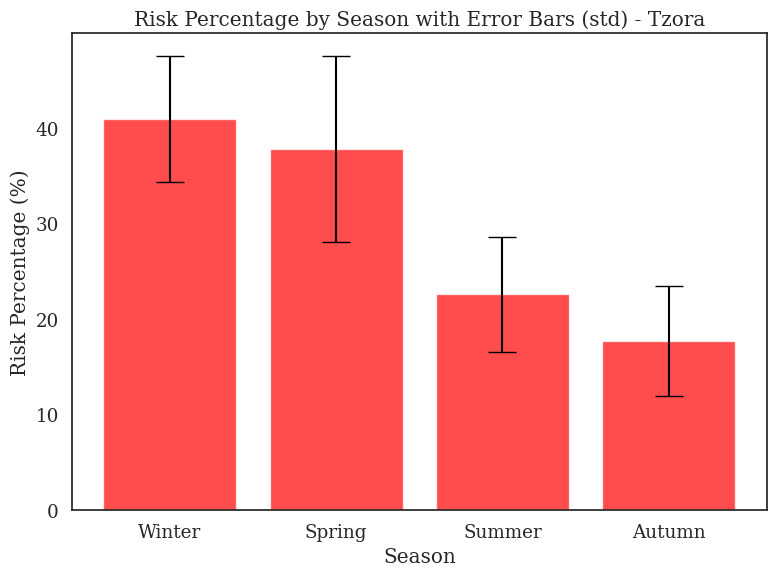

In [ ]:
def plot_dryness_percentage_with_error_bars(results, site):
    """Plot dryness percentage by season with error bars representing std deviation."""

    # Organize results by season
    seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

    # Create a dictionary to store dryness percentages per season
    season_data = {season: [] for season in seasons}

    for result in results:
        season_data[result['season']].append(result['dryness_percentage'])

    # Calculate mean and standard deviation for each season
    means = []
    std_devs = []

    for season in seasons:
        percentages = season_data[season]
        means.append(np.mean(percentages))
        std_devs.append(np.std(percentages))

    # Plot with error bars
    fig, ax = plt.subplots(figsize=(8, 6))

    x_pos = np.arange(len(seasons))  # X positions for the bars
    ax.bar(x_pos, means, yerr=std_devs, align='center', alpha=0.7, ecolor='black', capsize=10, color='red')

    # Labels and title
    ax.set_xticks(x_pos)
    ax.set_xticklabels(seasons)
    ax.set_xlabel('Season')
    ax.set_ylabel('Risk Percentage (%)')
    ax.set_title(f'Risk Percentage by Season with Error Bars (std) - {site}')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_dryness_percentage_with_error_bars(results, site)

#### percentages - type 1

<ipython-input-5-e7041712122f>:37: RuntimeWarning: overflow encountered in exp
  probabilities = 1 / (1 + np.exp(-decision_values))
<ipython-input-5-e7041712122f>:37: RuntimeWarning: overflow encountered in exp
  probabilities = 1 / (1 + np.exp(-decision_values))


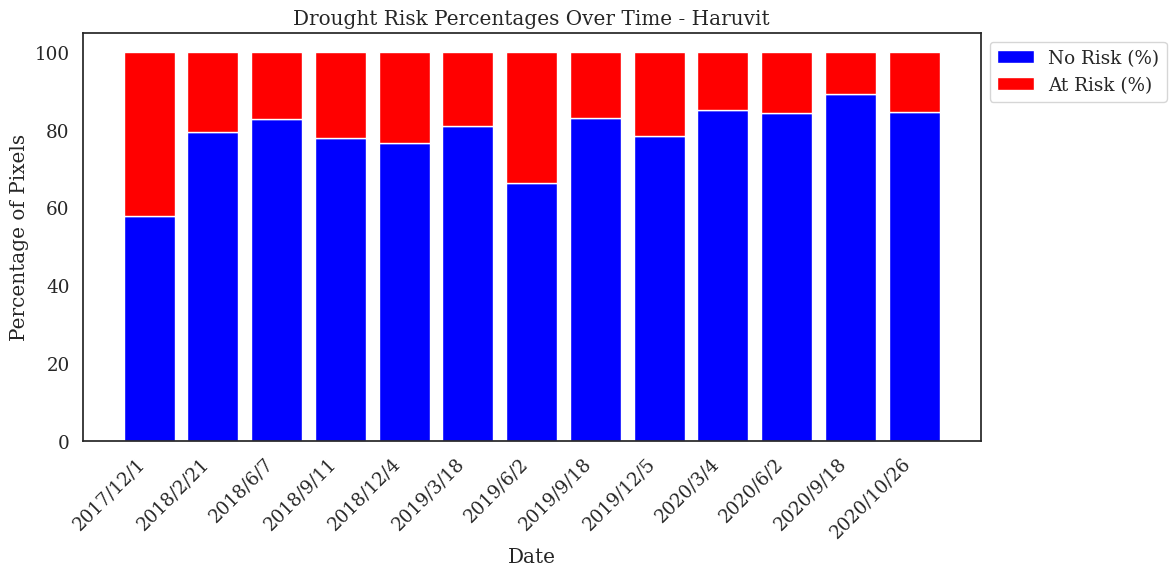

In [ ]:
def plot_drought_risk_percentages(file_list, model, scaler):
    """Plot the percentage of drought risk and no risk for each image."""
    positive_percentages = []
    negative_percentages = []
    dates = []

    for file_path in file_list:
        # Predict and get the positive/negative counts
        _, _, _, negative_count, positive_count = predict_geotiff(model, scaler, file_path)

        # Calculate percentages
        total_pixels = positive_count + negative_count
        positive_percentage = (positive_count / total_pixels) * 100
        negative_percentage = (negative_count / total_pixels) * 100

        positive_percentages.append(positive_percentage)
        negative_percentages.append(negative_percentage)

        # Extract date from filename for labeling
        filename = os.path.basename(file_path)
        parts = filename.split('_')
        site = parts[0]
        day = int(parts[3])
        month = int(parts[4])
        year = int(parts[5].split('.')[0])  # Remove the file extension
        date_label = f"{day}/{month}/{year}"
        dates.append(date_label)

    # Plot the percentages
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(dates, positive_percentages, color='blue', label='No Risk (%)')
    ax.bar(dates, negative_percentages, bottom=positive_percentages, color='red', label='At Risk (%)')

    ax.set_xlabel('Date')
    ax.set_ylabel('Percentage of Pixels')
    ax.set_title(f'Drought Risk Percentages Over Time - {site}')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Plot the drought risk percentages for multiple files
plot_drought_risk_percentages(list_files, model, scaler)

#### percentage - type 2

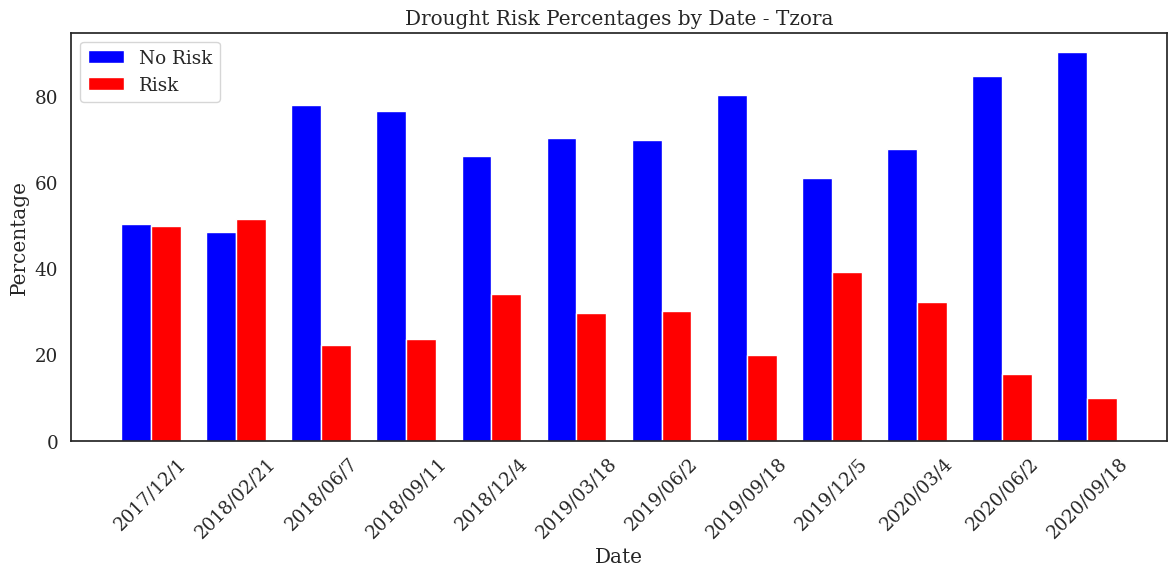

In [ ]:
def plot_drought_risk_percentages(file_list, model, scaler):
    """Plot drought risk percentages for each image in side-by-side bars."""
    dates = []
    positive_percentages = []
    negative_percentages = []

    for file_path in file_list:
        # Extract date from filename
        filename = os.path.basename(file_path)
        try:
            parts = filename.split('_')
            site = parts[0]
            day = int(parts[3])
            month = int(parts[4])
            year = int(parts[5].split('.')[0])  # Remove the file extension
            date = f"{day:02d}/{month:02d}/{year}"
        except (IndexError, ValueError) as e:
            print(f"Error parsing date from filename {filename}: {e}")
            continue

        dates.append(date)

        # Make predictions and get pixel counts
        binary_predictions, _, _, negative_count, positive_count = predict_geotiff(model, scaler, file_path)

        # Calculate percentages
        total_pixels = positive_count + negative_count
        positive_percentage = (positive_count / total_pixels) * 100
        negative_percentage = (negative_count / total_pixels) * 100

        positive_percentages.append(positive_percentage)
        negative_percentages.append(negative_percentage)

    # Plotting
    x = np.arange(len(dates))  # Label locations
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width/2, positive_percentages, width, label='No Risk', color='blue')
    rects2 = ax.bar(x + width/2, negative_percentages, width, label='Risk', color='red')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Date')
    ax.set_ylabel('Percentage')
    ax.set_title(f'Drought Risk Percentages by Date - {site}')
    ax.set_xticks(x)
    ax.set_xticklabels(dates, rotation=45)
    ax.legend()

    # # Add percentage labels on top of the bars
    # def autolabel(rects):
    #     for rect in rects:
    #         height = rect.get_height()
    #         ax.annotate(f'{height:.1f}%',
    #                     xy=(rect.get_x() + rect.get_width() / 2, height),
    #                     xytext=(0, 3),  # 3 points vertical offset
    #                     textcoords="offset points",
    #                     ha='center', va='bottom')

    # autolabel(rects1)
    # autolabel(rects2)

    plt.tight_layout()
    plt.show()

# Main execution

filename = MODEL_PATH
model, scaler = load_model_and_scaler(filename)

plot_drought_risk_percentages(list_files, model, scaler)